In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [19]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df["date"], inplace=True)
df = df.sort_index()

print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

In [12]:
#df.plot()

In [13]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

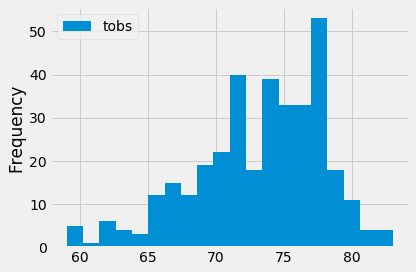

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

df = pd.DataFrame(results, columns=['tobs'])
#df

df.plot.hist(bins=20)
plt.tight_layout()

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [38]:
#finding data for june
june = []
june = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==6).all()

#print(june)

june_df = pd.DataFrame(june, columns=["Date", "Percipitation"])
june_df.set_index(june_df["Date"], inplace=True)
june_df = june_df.sort_index()

print(june_df.to_string(index=False))

       Date  Percipitation
 2010-06-01           78.0
 2010-06-01           73.0
 2010-06-01           77.0
 2010-06-01           69.0
 2010-06-01           76.0
 2010-06-01           71.0
 2010-06-01           74.0
 2010-06-01           70.0
 2010-06-01           74.0
 2010-06-02           78.0
 2010-06-02           70.0
 2010-06-02           76.0
 2010-06-02           76.0
 2010-06-02           71.0
 2010-06-02           76.0
 2010-06-02           76.0
 2010-06-02           72.0
 2010-06-02           76.0
 2010-06-03           74.0
 2010-06-03           78.0
 2010-06-03           73.0
 2010-06-03           72.0
 2010-06-03           77.0
 2010-06-03           76.0
 2010-06-03           75.0
 2010-06-03           78.0
 2010-06-03           67.0
 2010-06-04           73.0
 2010-06-04           75.0
 2010-06-04           75.0
 2010-06-04           76.0
 2010-06-04           73.0
 2010-06-04           68.0
 2010-06-04           72.0
 2010-06-04           70.0
 2010-06-04           74.0
 

In [37]:
june_df.describe()

,Percipitation
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [39]:
#finding data for december
december = []
december = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==12).all()

#print(december)

december_df = pd.DataFrame(december, columns=["Date", "Percipitation"])
december_df.set_index(december_df["Date"], inplace=True)
december_df = december_df.sort_index()

print(december_df.to_string(index=False))

       Date  Percipitation
 2010-12-01           76.0
 2010-12-01           73.0
 2010-12-01           72.0
 2010-12-01           78.0
 2010-12-01           72.0
 2010-12-01           70.0
 2010-12-01           71.0
 2010-12-01           73.0
 2010-12-02           71.0
 2010-12-02           71.0
 2010-12-02           73.0
 2010-12-02           75.0
 2010-12-02           74.0
 2010-12-02           72.0
 2010-12-02           74.0
 2010-12-02           70.0
 2010-12-03           67.0
 2010-12-03           74.0
 2010-12-03           70.0
 2010-12-03           74.0
 2010-12-03           71.0
 2010-12-03           74.0
 2010-12-03           72.0
 2010-12-03           73.0
 2010-12-04           75.0
 2010-12-04           72.0
 2010-12-04           77.0
 2010-12-04           74.0
 2010-12-04           74.0
 2010-12-04           78.0
 2010-12-04           74.0
 2010-12-05           66.0
 2010-12-05           69.0
 2010-12-05           71.0
 2010-12-05           78.0
 2010-12-05           73.0
 

In [40]:
december_df.describe()

,Percipitation
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [43]:
#statistics for temp by each station
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).all()

[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]